In [1]:
import sys
import yaml
import matplotlib

from functions_plot import * 

sys.path.append('../src/')
from config import cf
from functions import *

d:\anaconda3\envs\Python-R\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# Variables 

<font color='yellow'> labels: ['Not-COVID','COVID-19'] = [0,1] </font>

In [ ]:
augmented = cf['augmented']
model_name = cf['model_name']
epochs = cf['epochs'] 

# Load images
main_path_test = cf["main_path_test"]
main_path_train = cf["main_path_train"]
main_path_val = cf["main_path_val"]
folders = cf["folders"]

# batch_size for training
b_size = cf["b_size"]

# Save figures
figs_folder = cf["figs_folder"]

# Load model
checkpoint_path = cf["checkpoint_path"]

# Load history.history
path_save_history = cf["path_save_history"]

# Results
path_save_results = cf['path_save_results']  

# Plot font size
font = cf["font"]
matplotlib.rc('font', **font)


model_name = model_name + '_epochs-%s'%epochs

results = ""

image_gen_test = get_ImageDataGenerator()   

# Load Best Model and History

In [4]:
# Best model
model = get_saved_model(checkpoint_path + model_name + '_best_model.h5')
    
# History
path_history = path_save_history + 'history_' + model_name 
    
history = load_history(path_history)

# Plot learning curves

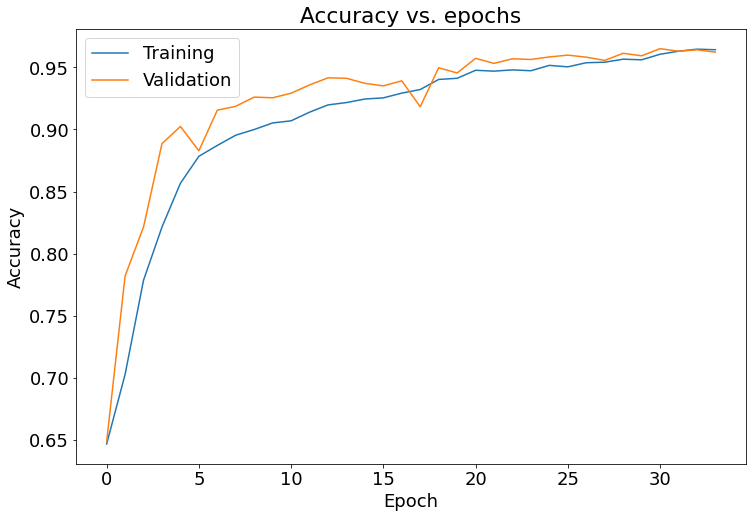

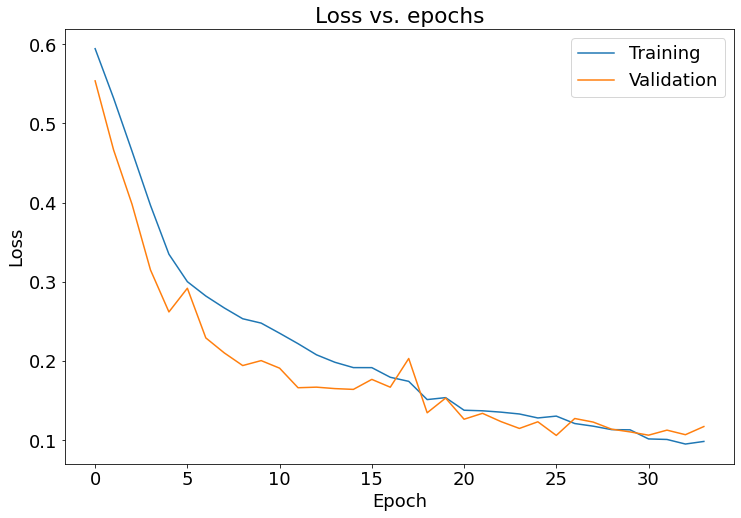

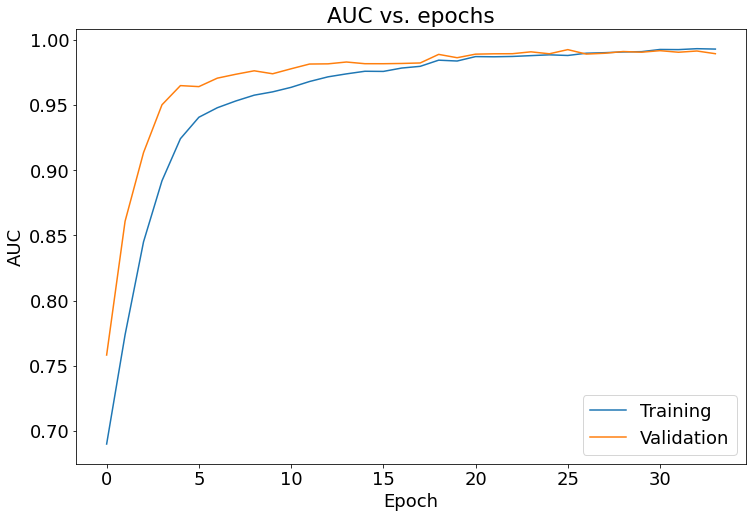

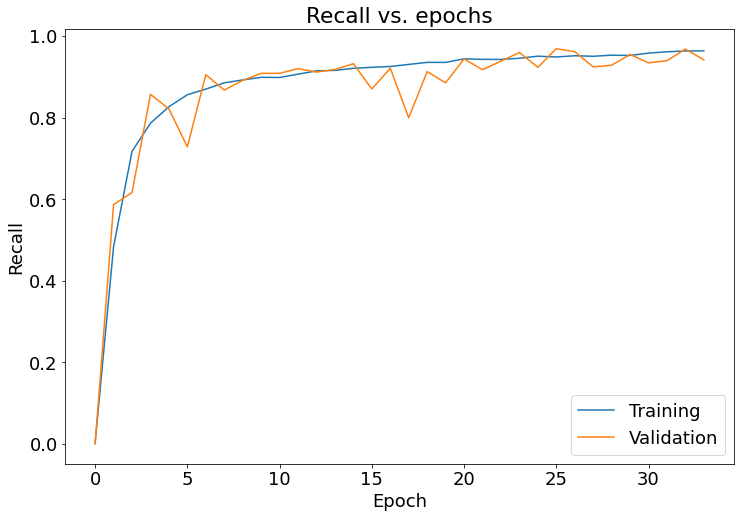

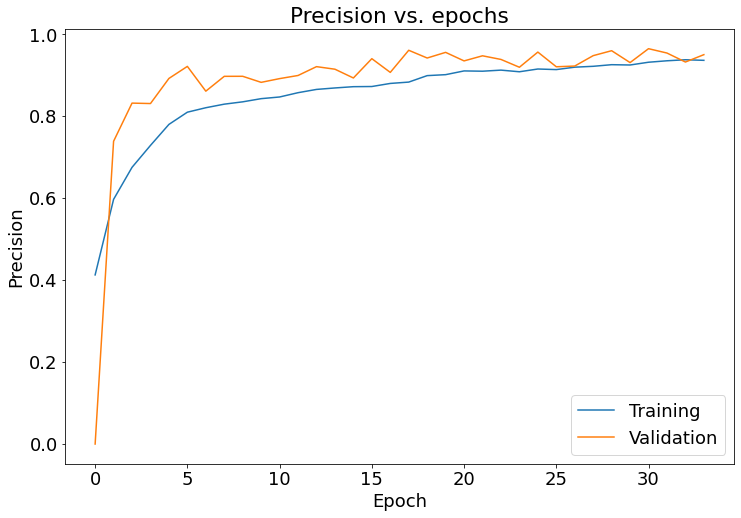

In [5]:
path_fig = figs_folder + model_name + '_aug_'

plot_metrics_vs_epoch(history,path_fig,to_save=True)

# Evaluate on the test set

In [5]:
msg = "AUGMENTED\n-> Evaluate\n"

results += msg

test_generator = get_generator(image_gen_test, main_path_test,folders,256,b_size,False,1) 

msg = model.evaluate(test_generator, verbose=0)

results += str(model.metrics_names) + '\n'
results += str(msg) + '\n'

print(results)

Found 6788 images belonging to 2 classes.
AUGMENTED
-> Evaluate
['loss', 'acc', 'auc', 'recall', 'precision']
[0.09626125544309616, 0.9678844809532166, 0.9922473430633545, 0.962421715259552, 0.947390079498291]



# Predict on the test set

In [6]:
results += "-> Predict\n"

test_generator = get_generator(image_gen_test, main_path_test,folders,256,b_size,False,1) 
predictions = model.predict(test_generator)

y_pred = sigmoid_prediction_to_binary_class(predictions)
y_test = test_generator.classes

print("Prediction: ", y_pred[:10])
print("True values: ", y_test[:10])

Found 6788 images belonging to 2 classes.
Prediction:  [0 0 0 0 0 0 0 0 0 0]
True values:  [0 0 0 0 0 0 0 0 0 0]


# Plot: classification_report, confusion matrix, prediction e evaluate

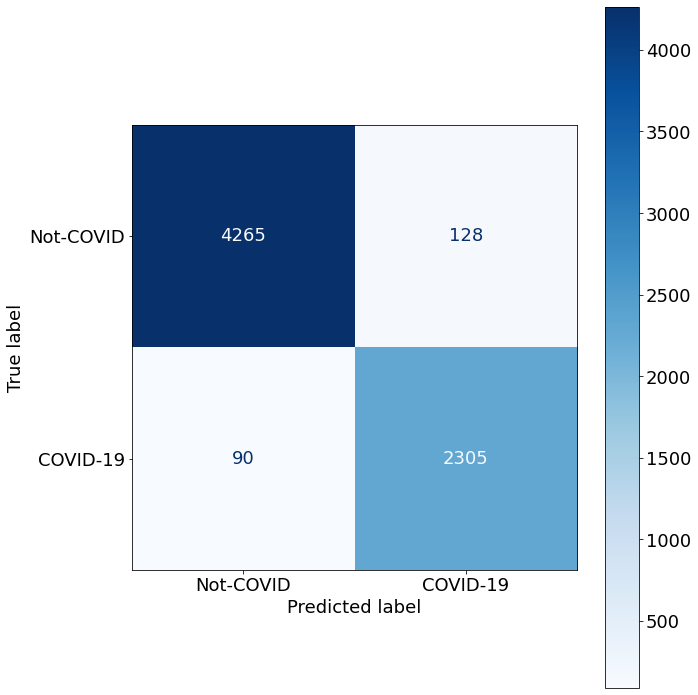

Confusion matrix saved at: figs_txt/figs/model_5_epochs-60_aug_confusion_matrix.png


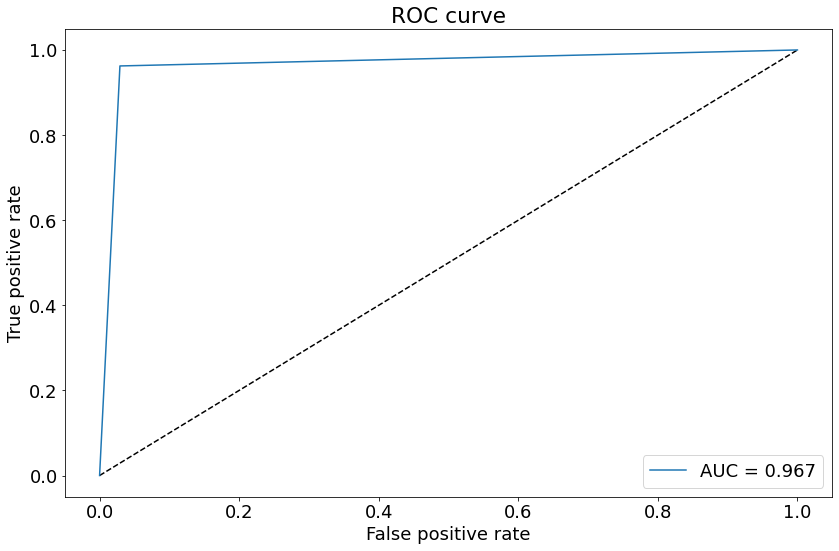

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4393
           1       0.95      0.96      0.95      2395

    accuracy                           0.97      6788
   macro avg       0.96      0.97      0.96      6788
weighted avg       0.97      0.97      0.97      6788

Confusion Matrix
[[4265  128]
 [  90 2305]]
TN: 4265, FP: 128, FN: 90, TP: 2305
Accuracy 0.97, Precision 0.95, Recall 0.96, AUC 0.97



In [7]:
fig_path = figs_folder + model_name + '_aug_'

    
save_figs = True
msg = get_prediction_metrics(y_test,y_pred,fig_path,folders,save_figs)

results += msg

## Save results to file

In [9]:
path_save_results = path_save_results + model_name + '_aug_' + 'results'

text_file = open(path_save_results + '.txt', "w")
text_file.write(results)
text_file.close()